In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline
df = pd.read_csv('2017-fordgobike-tripdata.csv')

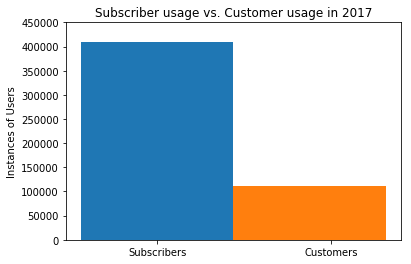

In [2]:
#Use length of subgroup to determine total usage by type
non_sub_count=len(df[df['user_type']=='Customer'])
sub_count=len(df[df['user_type']=='Subscriber'])
#bar graph setup
N = 1
ind = np.arange(N)
width = 0.35

p1 = plt.bar(ind, sub_count, width)
p2 = plt.bar(ind+width, non_sub_count, width)

plt.ylabel('Instances of Users')
plt.title('Subscriber usage vs. Customer usage in 2017')
plt.xticks(np.arange(0, .80, step=0.40), ('Subscribers','Customers'))
plt.yticks(np.arange(0, 500000,step=50000))

plt.show()

## Pricing of Go Ford Bike
### Customers
Single ride (up to 30 minutes) - 3.00

Day Access (unlimited 30 minute rides) - 10.00

3 Day Access (unlimited 30 minute rides) - 20.00

### Subscribers
Monthly Subscriber(unlimited 45 minutes) - 15.00

### Late Fees
Bikes kept out longer than allowed trip time - 3.00 per 15 minutes

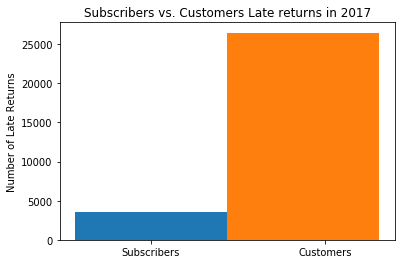

In [3]:
# want to obtain the amount of income from subscribers versus customers
# to change for seconds to minutes need to use module 60 and divide by 60
# need to obtain a list of customer that went over their allowed time, use divide 15 to see increments
late_group = df[df['duration_sec'] > 1800]
sub_late_group = late_group[late_group['duration_sec'] > 2700]
non_sub_late=late_group[late_group['user_type']=='Customer']
#Note that subscribers have a time limit of 45 minutes
sub_late=sub_late_group[sub_late_group['user_type']=='Subscriber']

N = 1
ind = np.arange(N)
width = 0.35

p1 = plt.bar(ind, len(sub_late), width)
p2 = plt.bar(ind+width, len(non_sub_late), width)

plt.ylabel('Number of Late Returns')
plt.title('Subscribers vs. Customers Late returns in 2017')
plt.xticks(np.arange(0, .80, step=0.40), ('Subscribers','Customers'))
plt.yticks(np.arange(0, 30000,step=5000))

plt.show()

In [4]:
# make a list containing the number of seconds that subs went over
# can only be ran once due to stacking values
non_sub_late['duration_sec']=non_sub_late['duration_sec']- 1800
sub_late['duration_sec']=sub_late['duration_sec']-2700

c:\users\family\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\family\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


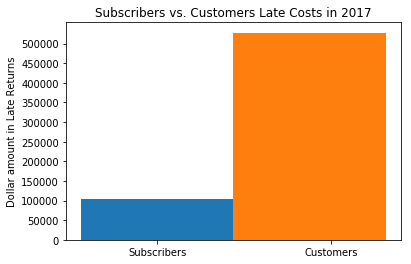

In [5]:
non_sub_late_income=non_sub_late[['user_type','duration_sec']].groupby('user_type').sum()
sub_late_income=sub_late[['user_type','duration_sec']].groupby('user_type').sum()
#divide by 60 to obtain minutes
non_sub_late_income['duration_sec']=non_sub_late_income['duration_sec']/60
sub_late_income['duration_sec']=sub_late_income['duration_sec']/60
#divide by 15 to see the total increments that they went over 
non_sub_late_income['duration_sec']=math.ceil(non_sub_late_income['duration_sec']/15)
sub_late_income['duration_sec']=math.ceil(sub_late_income['duration_sec']/15)
# multiply by 3 per 15
non_sub_late_income['duration_sec']=non_sub_late_income['duration_sec']*3
sub_late_income['duration_sec']=sub_late_income['duration_sec']*3

N = 1
ind = np.arange(N)
width = 0.35

p1 = plt.bar(ind, sub_late_income['duration_sec'], width)
p2 = plt.bar(ind+width, non_sub_late_income['duration_sec'], width)

plt.ylabel('Dollar amount in Late Returns')
plt.title('Subscribers vs. Customers Late Costs in 2017' )
#plt.xticks(np.arange(0, 1, step=0.5), ('{}'.format('Subscribers')),'{}'.format('Customers'))
plt.xticks(np.arange(0, .80, step=0.40), ('Subscribers','Customers'))
plt.yticks(np.arange(0, 530000,step=50000))
plt.show()
#change to average latefee

In [6]:
df_route=df[['start_station_name','end_station_name','duration_sec']].groupby(['start_station_name','end_station_name']).count().sort_values('duration_sec', ascending=False)
route_20=df_route.reset_index().head(20)

Text(0,0.5,'Name of Route')

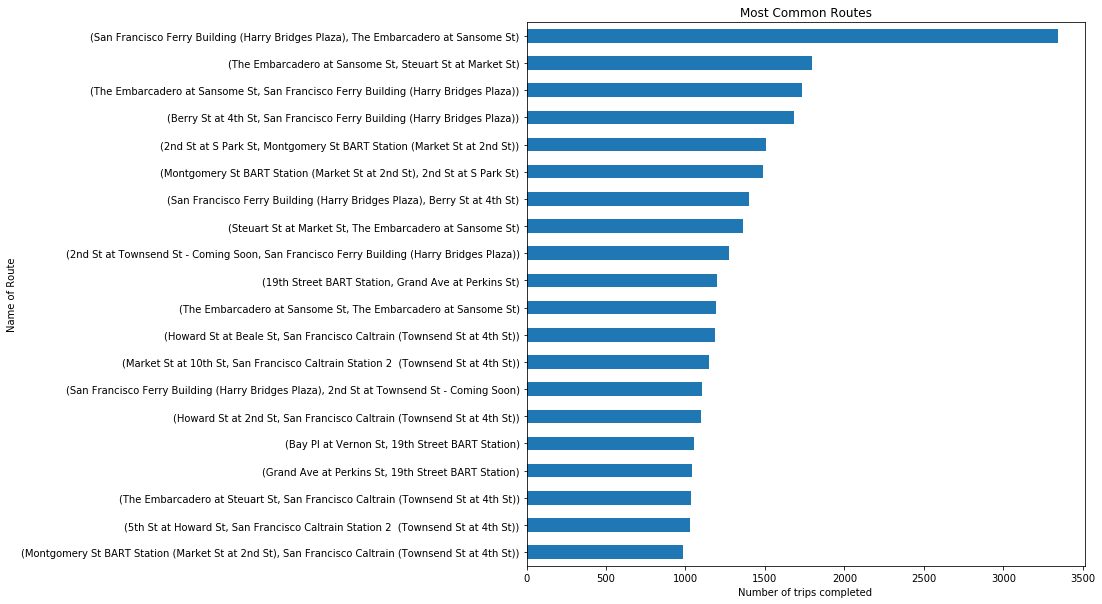

In [7]:
#most common routes taken
ax=df_route.head(20).sort_values('duration_sec',ascending=True).plot(title='Most Common Routes',kind='barh',figsize=(10,10),fontsize=10,sort_columns=True,legend=False)
ax.set_xlabel('Number of trips completed')
ax.set_ylabel('Name of Route')

In [8]:

df_route_distance = df[['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','duration_sec']].groupby(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).count().sort_values('duration_sec', ascending=False)

distance_df = np.arange(len(df_route_distance),dtype=np.float)
#Make list, find distance, save that distance to new list
# approximate radius of earth in km
R = 6373.0
for m in range(0,len(df_route_distance)):
    start_lat = math.radians(df_route_distance.add_suffix('_Count').reset_index().loc[m,'start_station_latitude'])
    start_long = math.radians(df_route_distance.add_suffix('_Count').reset_index().loc[m,'start_station_longitude'])
    end_lat = math.radians(df_route_distance.add_suffix('_Count').reset_index().loc[m,'end_station_latitude'])
    end_long = math.radians(df_route_distance.add_suffix('_Count').reset_index().loc[m,'end_station_longitude'])
    
    dlon = end_long - start_long
    dlat = end_lat - start_lat

    a = math.sin(dlat / 2)**2 + math.cos(start_lat) * math.cos(end_lat) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance_df[m] = R * c
    

Text(0,0.5,'Name of Route')

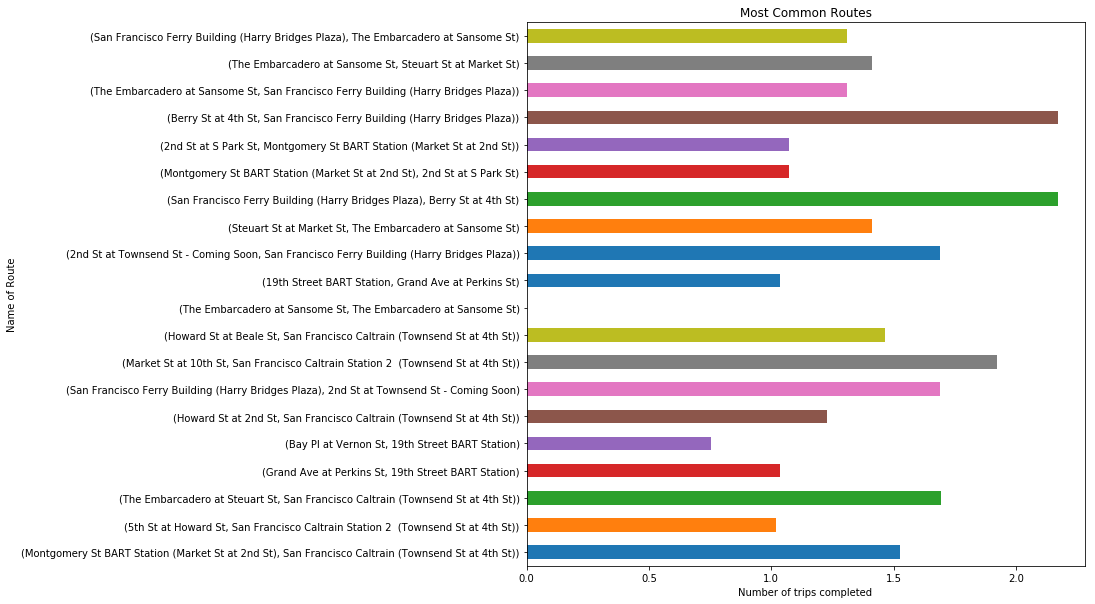

In [9]:
#apply distance found in cell above
df_route['distance']=distance_df
ax=df_route.head(20).sort_values('duration_sec',ascending=True).plot(y='distance',title='Most Common Routes',kind='barh',figsize=(10,10),fontsize=10,sort_columns=True,legend=False)
ax.set_xlabel('Number of trips completed')
ax.set_ylabel('Name of Route')

In [10]:
#merge used to find individual bike distance later on
bike_result_df=pd.merge(df,df_route,on=['start_station_name','end_station_name'])

In [11]:
#Find the individual times a station was used to start and end a trip
df_station_count_start=df[['start_station_name','duration_sec']].groupby(['start_station_name']).count().sort_values('start_station_name', ascending=False).reset_index()
df_station_count_end=df[['end_station_name','duration_sec']].groupby(['end_station_name']).count().sort_values('end_station_name', ascending=False).reset_index()

Text(0,0.5,'Name of station')

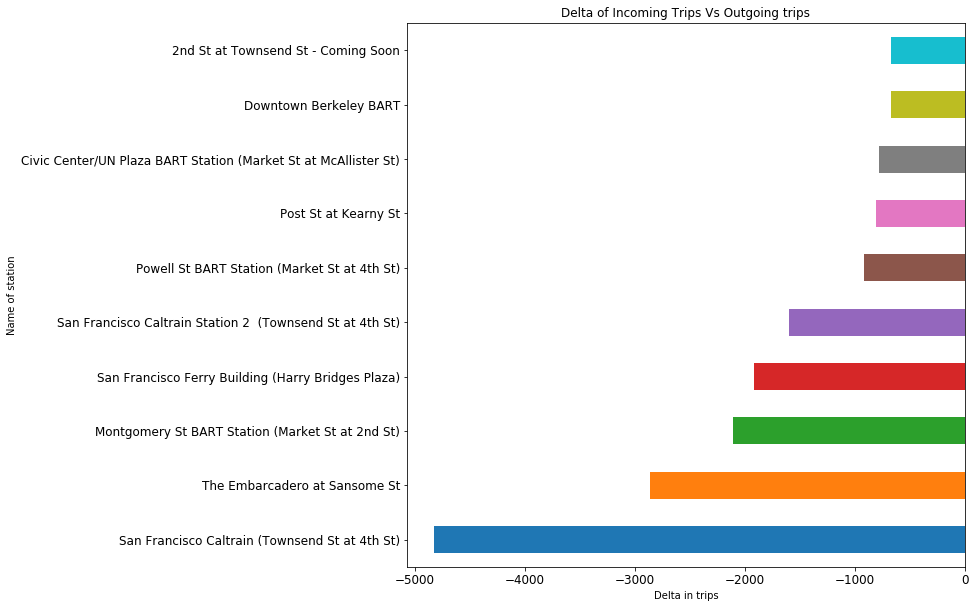

In [12]:
#combine both df's found on last cell to find the delta of trips
df_station_count_start['delta']=df_station_count_start['duration_sec']-df_station_count_end['duration_sec']
df_station_count_start['end_count']=df_station_count_end['duration_sec']

ax=df_station_count_start.sort_values('delta', ascending=True).head(10).plot(kind='barh',y='delta',x='start_station_name',figsize=(10,10),fontsize=12,title='Delta of Incoming Trips Vs Outgoing trips',legend=False)
ax.set_xlabel('Delta in trips')
ax.set_ylabel('Name of station')

Text(0,0.5,'Name of station')

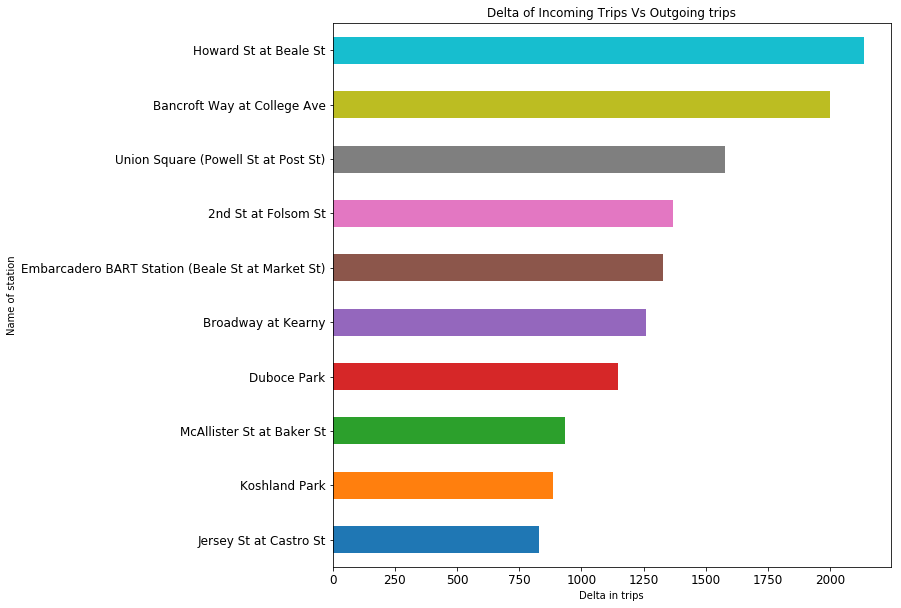

In [13]:
ax=df_station_count_start.sort_values('delta', ascending=True).tail(10).plot(kind='barh',y='delta',x='start_station_name',figsize=(10,10),fontsize=12,title='Delta of Incoming Trips Vs Outgoing trips',legend=False)
ax.set_xlabel('Delta in trips')
ax.set_ylabel('Name of station')

In [20]:
bike_cus_stations=bike_result_df[bike_result_df['user_type']=='Customer']
bike_sub_stations=bike_result_df[bike_result_df['user_type']=='Subscriber']

In [22]:
bike_cus_stations

,duration_sec_x,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,duration_sec_y,distance
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,173,0.898740
22,206,2017-12-11 08:33:46.5920,2017-12-11 08:37:13.4520,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,1842,Customer,1988.0,Male,173,0.898740
33,240,2017-12-06 09:11:07.3600,2017-12-06 09:15:07.3740,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,3344,Customer,1988.0,Male,173,0.898740
65,472,2017-11-11 14:32:51.9150,2017-11-11 14:40:44.8850,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,2982,Customer,1994.0,Male,173,0.898740
66,455,2017-11-11 14:32:52.2720,2017-11-11 14:40:27.9400,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,2118,Customer,1978.0,Male,173,0.898740
72,266,2017-11-08 08:30:40.4070,2017-11-08 08:35:06.6360,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,2775,Customer,1988.0,Male,173,0.898740
91,244,2017-10-26 08:32:01.1330,2017-10-26 08:36:05.6610,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,1786,Customer,1988.0,Male,173,0.898740
105,341,2017-10-19 07:39:42.2990,2017-10-19 07:45:24.0370,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,2834,Customer,NaN,NaN,173,0.898740
118,365,2017-10-08 16:00:15.9610,2017-10-08 16:06:21.0810,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,317,Customer,NaN,NaN,173,0.898740
120,274,2017-10-06 09:41:43.7390,2017-10-06 09:46:18.4650,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,2634,Customer,1988.0,Male,173,0.898740


In [23]:
bike_sub_stations_start=bike_sub_stations[['start_station_name','duration_sec_y']].groupby(['start_station_name']).count().sort_values('start_station_name', ascending=False).reset_index()
bike_sub_stations_end=bike_sub_stations[['end_station_name','duration_sec_y']].groupby(['end_station_name']).count().sort_values('end_station_name', ascending=False).reset_index()

bike_cus_stations_start=bike_cus_stations[['start_station_name','duration_sec_y']].groupby(['start_station_name']).count().sort_values('start_station_name', ascending=False).reset_index()
bike_cus_stations_end=bike_cus_stations[['end_station_name','duration_sec_y']].groupby(['end_station_name']).count().sort_values('end_station_name', ascending=False).reset_index()

In [26]:
bike_sub_stations_start.columns=['station_name','station_count']
bike_sub_stations_end.columns=['station_name','station_count']

bike_cus_stations_start.columns=['station_name','station_count']
bike_cus_stations_end.columns=['station_name','station_count']

In [28]:
bike_sub_stations_start['station_total']=bike_sub_stations_start['station_count']+bike_sub_stations_end['station_count']
bike_sub_stations_end['station_total']=bike_sub_stations_start['station_count']+bike_sub_stations_end['station_count']

bike_cus_stations_start['station_total']=bike_cus_stations_start['station_count']+bike_cus_stations_end['station_count']
bike_cus_stations_end['station_total']=bike_cus_stations_start['station_count']+bike_cus_stations_end['station_count']

In [32]:
bike_cus_stations_start.sort_values('station_total', ascending=False)

,station_name,station_count,station_total
26,The Embarcadero at Sansome St,5864,14138.0
58,San Francisco Ferry Building (Harry Bridges Pl...,5210,10305.0
79,Powell St BART Station (Market St at 4th St),3174,6328.0
78,Powell St BART Station (Market St at 5th St),2087,4434.0
21,Union Square (Powell St at Post St),2133,4352.0
24,The Embarcadero at Vallejo St,2098,4251.0
108,Market St at 10th St,1847,3520.0
36,Steuart St at Market St,1628,3452.0
93,Montgomery St BART Station (Market St at 2nd St),1750,3376.0
9,Washington St at Kearny St,1258,2437.0


270


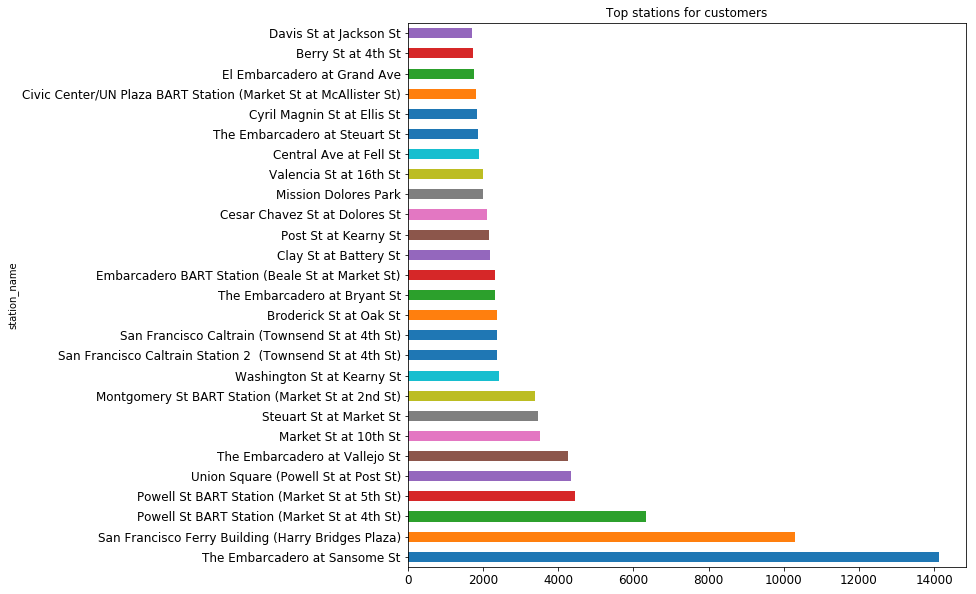

In [37]:
bike_cus_stations_start[['station_name','station_total']].sort_values('station_total', ascending=False).head(27).plot(kind='barh',y='station_total',x='station_name',figsize=(10,10),fontsize=12,title='Top stations for customers',legend=False)
ax.set_xlabel('count of stations')
ax.set_ylabel('Name of station')
print(len(bike_cus_stations_start))
# top 27 stations, 10% of total stations, to do the roll out

In [14]:
from datetime import datetime
#format date column to work with datetime library
df['start_time']=df['start_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))
df['end_time']=df['end_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))

In [15]:
#setup a df to have time as index
df_time_index=df.set_index('start_time')

c:\users\family\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\family\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0,0.5,'Number of route trips')

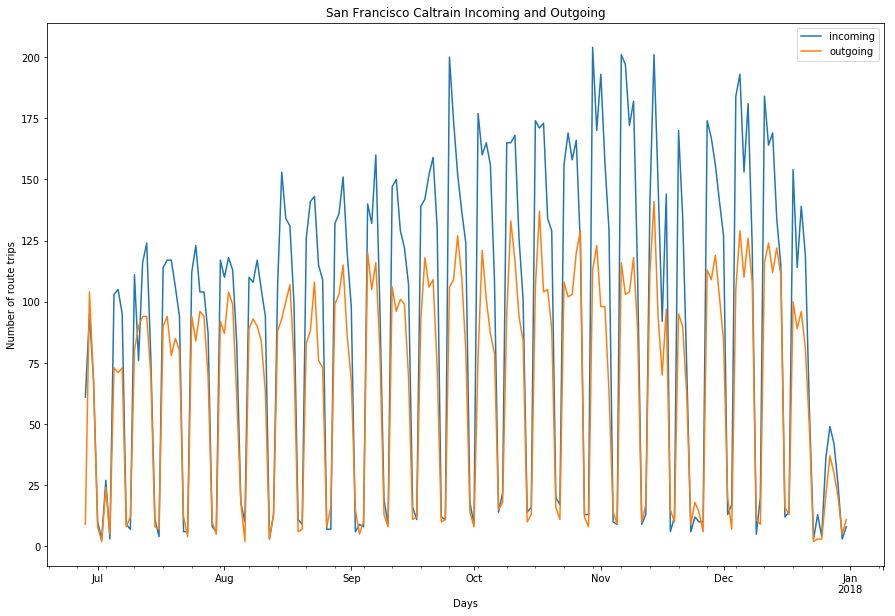

In [16]:
df_time_station_caltrain=df_time_index[(df_time_index['start_station_name']=='San Francisco Caltrain (Townsend St at 4th St)') | (df_time_index['end_station_name']=='San Francisco Caltrain (Townsend St at 4th St)')]
# use lambda function to assign when it is incoming, outgoing, or loop
# then use sum to see for each day
df_time_station_caltrain['incoming']=df_time_station_caltrain['end_station_name'].apply(lambda x:x=='San Francisco Caltrain (Townsend St at 4th St)')
df_time_station_caltrain['outgoing']=df_time_station_caltrain['start_station_name'].apply(lambda x:x=='San Francisco Caltrain (Townsend St at 4th St)')

ax=df_time_station_caltrain.resample('D').sum().plot(y=['incoming','outgoing'],figsize=(15,10),title='San Francisco Caltrain Incoming and Outgoing')
ax.set_xlabel('Days')
ax.set_ylabel('Number of route trips')

c:\users\family\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\family\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0,0.5,'Number of route trips')

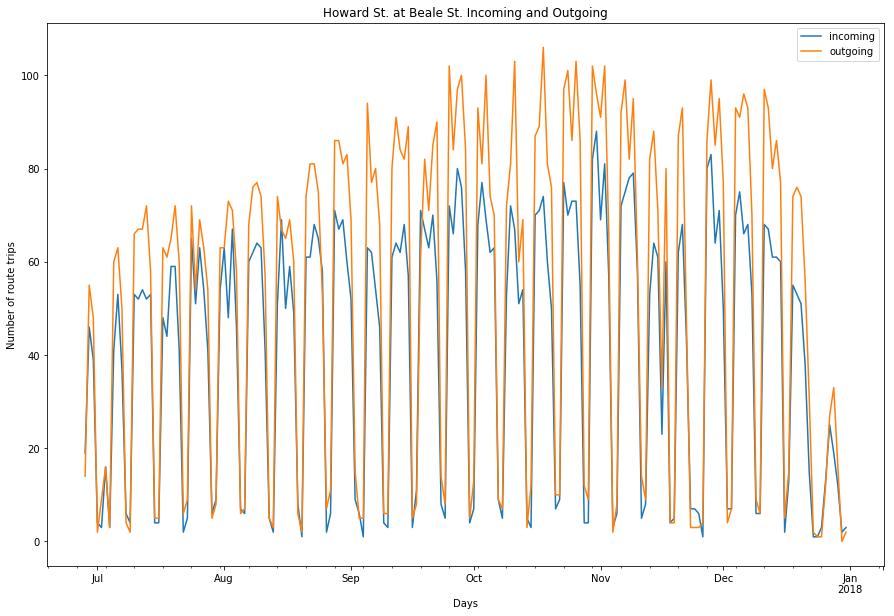

In [17]:
df_time_station_howard=df_time_index[(df_time_index['start_station_name']=='Howard St at Beale St') | (df_time_index['end_station_name']=='Howard St at Beale St')]
# use lambda function to assign when it is incoming, outgoing, or loop
# then use sum to see for each day
df_time_station_howard['incoming']=df_time_station_howard['end_station_name'].apply(lambda x:x=='Howard St at Beale St')
df_time_station_howard['outgoing']=df_time_station_howard['start_station_name'].apply(lambda x:x=='Howard St at Beale St')

ax=df_time_station_howard.resample('D').sum().plot(y=['incoming','outgoing'],figsize=(15,10),title='Howard St. at Beale St. Incoming and Outgoing')
ax.set_xlabel('Days')
ax.set_ylabel('Number of route trips')

Text(0,0.5,'Number of bike trips')

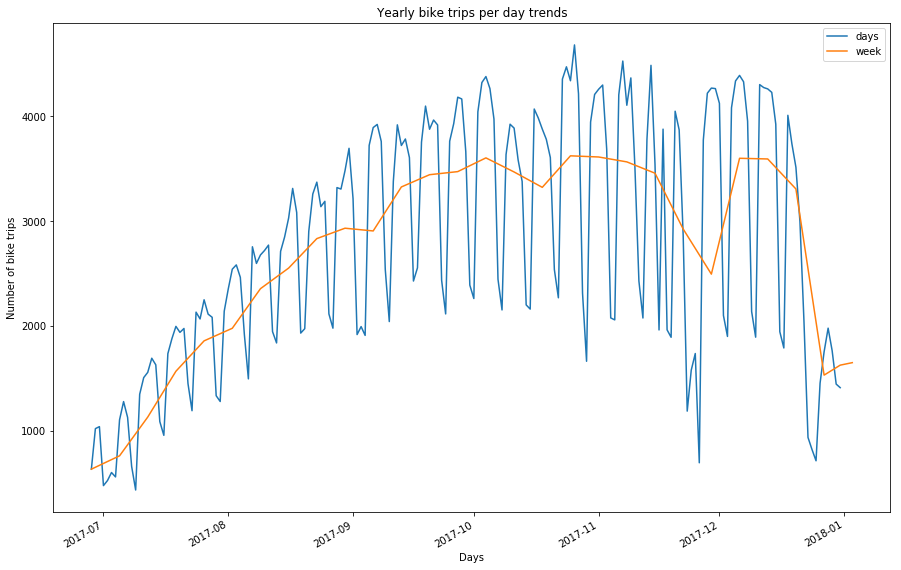

In [18]:
df_resample=df_time_index['duration_sec'].resample('D').count()
df_resample_week = df_resample.resample('W-WED').mean()
df_resample_day_and_week=pd.concat([df_resample,df_resample_week], axis=1)
df_resample_day_and_week.columns=['days','week']
#df_resample_day_and_week
df_resample_day_and_week['week']=df_resample_day_and_week['week'].interpolate()
ax=df_resample_day_and_week.plot(figsize=(15,10),title='Yearly bike trips per day trends')
ax.set_xlabel('Days')
ax.set_ylabel('Number of bike trips')
#do it hourly with mean
#do it weekly, join with daily for trend

Text(0,0.5,'Number of bike trips')

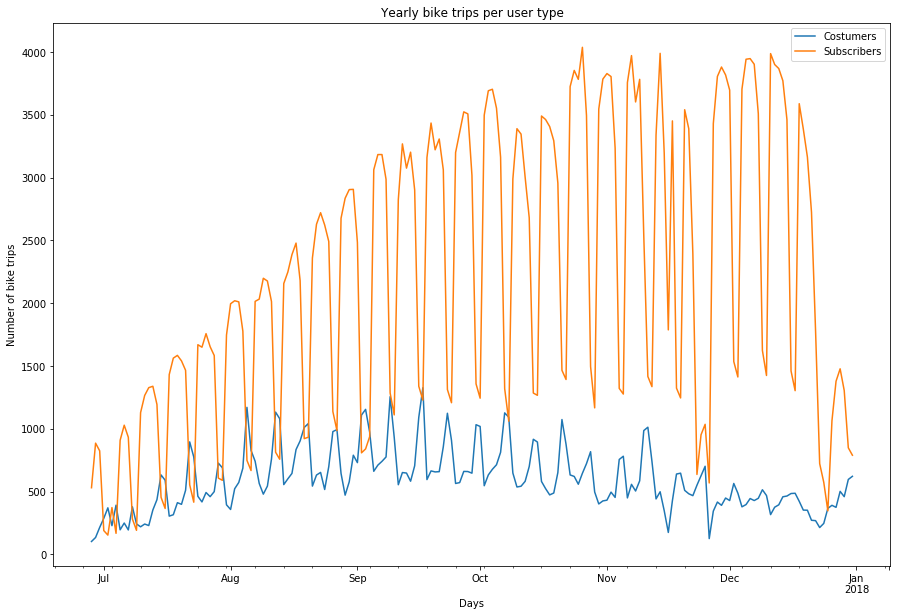

In [21]:
#seperate user types to see their indivdual trends
df_cus_time=df_time_index[df_time_index['user_type']=='Customer'].resample('D').count()
df_sub_time=df_time_index[df_time_index['user_type']=='Subscriber'].resample('D').count()
df_user_time=pd.concat([df_cus_time['duration_sec'],df_sub_time['end_time']], axis=1)
df_user_time.columns=['Costumers','Subscribers']
ax=df_user_time.plot(figsize=(15,10),title='Yearly bike trips per user type')
ax.set_xlabel('Days')
ax.set_ylabel('Number of bike trips')

Text(0.5,1,'Thanksgiving Hours of Data')

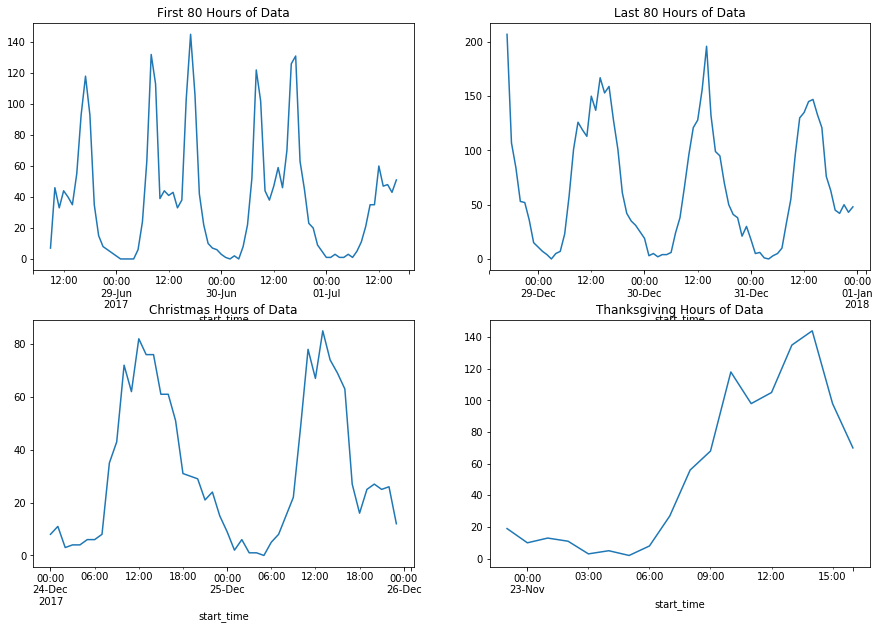

In [22]:
df_resample_hour=df_time_index['duration_sec'].resample('H').count()
fig, axes = plt.subplots(nrows=2, ncols=2)
df_resample_hour.iloc[0:80].plot(ax=axes[0,0],figsize=(15,10))
axes[0,0].set_title('First 80 Hours of Data')
df_resample_hour.iloc[4400:4500].plot(ax=axes[0,1],figsize=(15,10))
axes[0,1].set_title('Last 80 Hours of Data')
df_resample_hour.iloc[4287:4335].plot(ax=axes[1,0],figsize=(15,10))
axes[1,0].set_title('Christmas Hours of Data')
df_resample_hour.iloc[3542:3560].plot(ax=axes[1,1],figsize=(15,10))
axes[1,1].set_title('Thanksgiving Hours of Data')

Text(0,0.5,'Average number of trips')

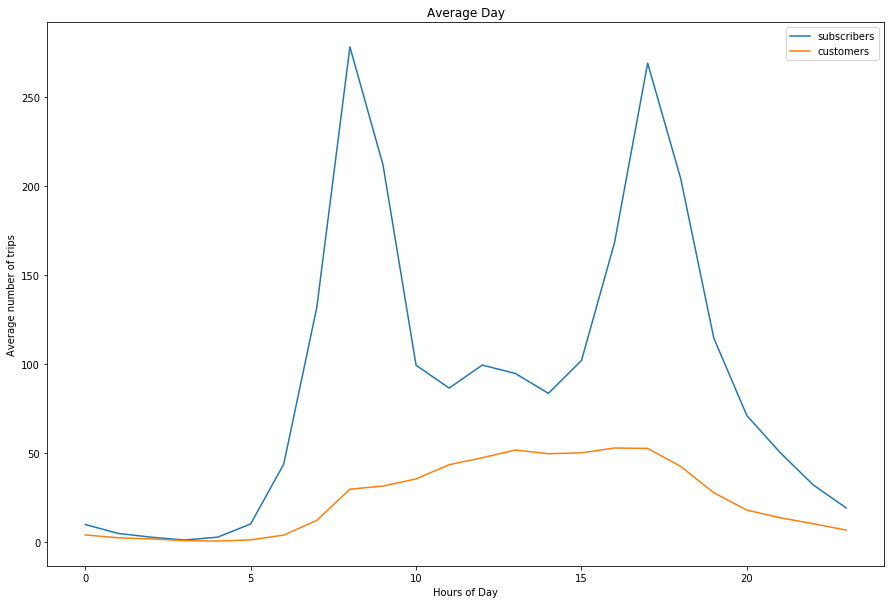

In [23]:
#finding what the average day looks like
df_mean_day_sub=df_time_index[df_time_index['user_type']=='Subscriber']
df_mean_day_cus=df_time_index[df_time_index['user_type']=='Customer']

df_mean_day_sub=df_mean_day_sub['duration_sec'].resample('H').count()
df_mean_day_cus=df_mean_day_cus['duration_sec'].resample('H').count()

df_mean_day_sub=df_mean_day_sub.reset_index()
df_mean_day_cus=df_mean_day_cus.reset_index()

df_mean_day_sub['hour_of_day']=df_mean_day_sub['start_time'].dt.hour
df_mean_day_cus['hour_of_day']=df_mean_day_cus['start_time'].dt.hour

df_mean_day_sub.columns=['start_time','subscribers','hour_of_day']
df_mean_day_cus.columns=['start_time','customers','hour_of_day']

df_mean_day_sub=df_mean_day_sub[['subscribers','hour_of_day']].groupby('hour_of_day').mean()
df_mean_day_cus=df_mean_day_cus[['customers','hour_of_day']].groupby('hour_of_day').mean()
#this final step was done to get all data on one df
df_mean_day_sub['customers']=df_mean_day_cus['customers']

ax=df_mean_day_sub.plot(title='Average Day',figsize=(15,10))
ax.set_xlabel('Hours of Day')
ax.set_ylabel('Average number of trips')

Text(0,0.5,'Average number of trip')

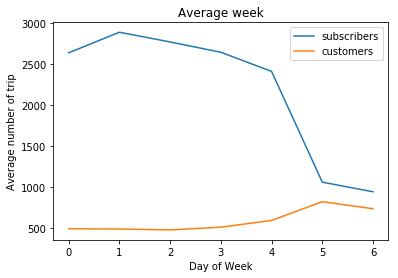

In [24]:
#finding what the average week looks like
df_mean_week_sub=df_time_index[df_time_index['user_type']=='Subscriber']
df_mean_week_cus=df_time_index[df_time_index['user_type']=='Customer']

df_mean_week_sub=df_mean_week_sub['duration_sec'].resample('D').count()
df_mean_week_cus=df_mean_week_cus['duration_sec'].resample('D').count()

df_mean_week_sub=df_mean_week_sub.reset_index()
df_mean_week_cus=df_mean_week_cus.reset_index()

df_mean_week_sub['day_of_week']=df_mean_week_sub['start_time'].dt.dayofweek
df_mean_week_cus['day_of_week']=df_mean_week_cus['start_time'].dt.dayofweek

df_mean_week_sub.columns=['start_time','subscribers','day_of_week']
df_mean_week_cus.columns=['start_time','customers','day_of_week']

df_mean_week_sub=df_mean_week_sub[['subscribers','day_of_week']].groupby('day_of_week').mean()
df_mean_week_cus=df_mean_week_cus[['customers','day_of_week']].groupby('day_of_week').mean()

df_mean_week_sub['customers']=df_mean_week_cus['customers']

ax=df_mean_week_sub.plot(title='Average week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Average number of trip')

Text(0.5,0,'Number of rides')

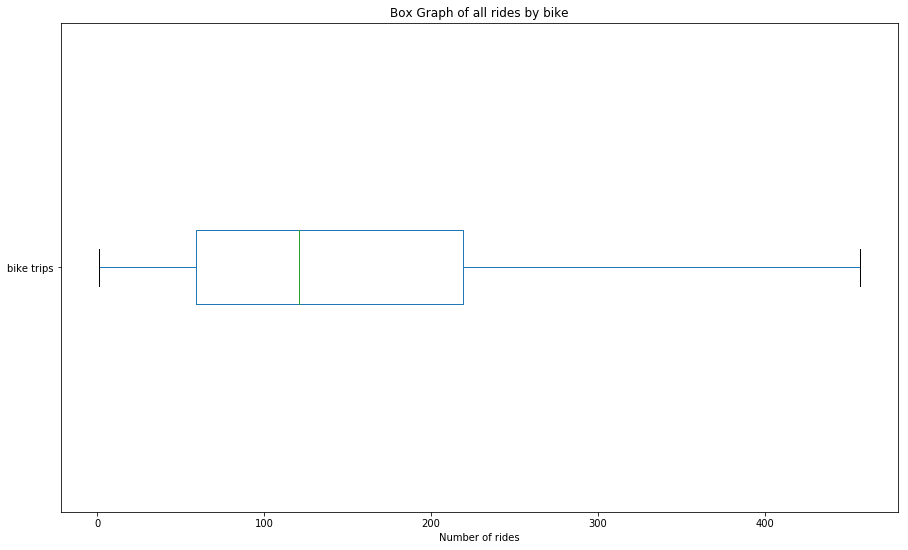

In [27]:
ax=bike_id_count.plot.box(figsize=(15,9),vert=False,title='Box Graph of all rides by bike')
ax.set_xlabel('Number of rides')

Text(0.5,0,'Number of Seconds')

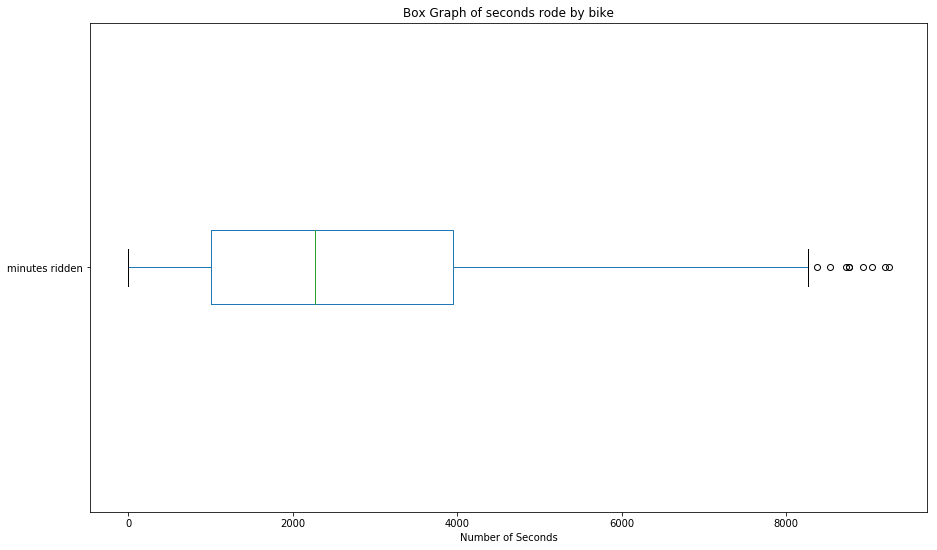

In [30]:
ax=bike_id_sum.plot.box(figsize=(15,9),vert=False,title='Box Graph of seconds rode by bike')
ax.set_xlabel('Number of Seconds')

(0.9258288177133038, 0.0)


Text(0,0.5,'number of total minutes')

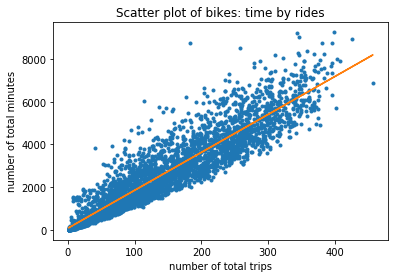

In [31]:
from scipy.stats.stats import pearsonr
bike_id_count_sum = pd.concat([bike_id_count,bike_id_sum], axis=1)
# Fit with polyfit
m, b = np.polyfit(bike_id_count_sum['bike trips'], bike_id_count_sum['minutes ridden'], 1)
#pearsonr
print(pearsonr(bike_id_count_sum['bike trips'], bike_id_count_sum['minutes ridden']))

plt.plot(bike_id_count_sum['bike trips'], bike_id_count_sum['minutes ridden'], '.')
plt.plot(bike_id_count_sum['bike trips'], b + m * bike_id_count_sum['bike trips'], '-')
plt.title('Scatter plot of bikes: time by rides')
plt.xlabel('number of total trips')
plt.ylabel('number of total minutes')

Text(0.5,0,'Distance in Km')

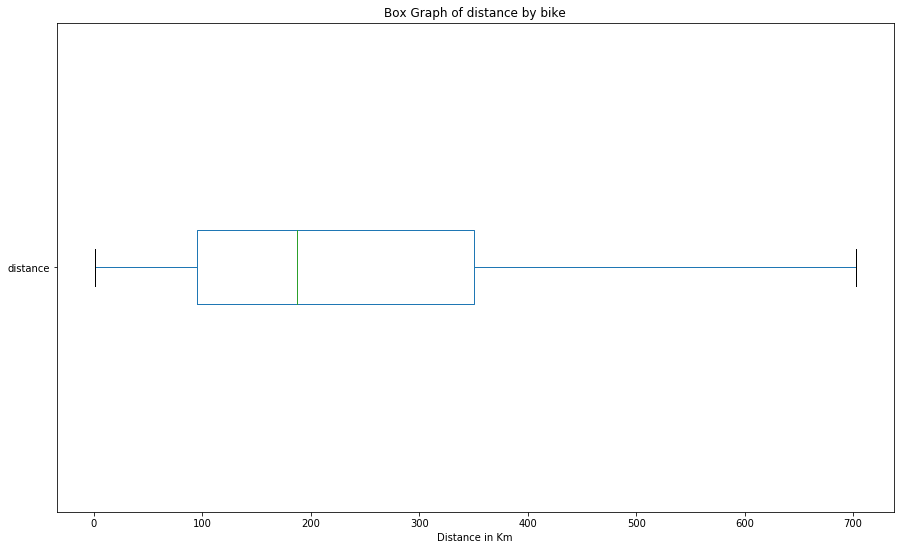

In [32]:
bike_id_distance=bike_result_df[['distance','bike_id']].groupby('bike_id').sum()
ax=bike_id_distance.plot.box(figsize=(15,9),vert=False,title='Box Graph of distance by bike')
ax.set_xlabel('Distance in Km')

(0.9202740276049688, 0.0)


Text(0,0.5,'number of total minutes')

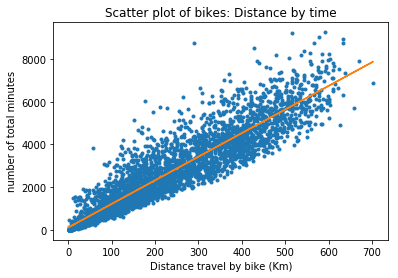

In [34]:
#polyfit regression line
m, b = np.polyfit(bike_id_distance['distance'], bike_id_count_sum['minutes ridden'], 1)
#pearsonr
print(pearsonr(bike_id_distance['distance'], bike_id_count_sum['minutes ridden']))

plt.plot(bike_id_distance['distance'], bike_id_count_sum['minutes ridden'], '.')
plt.plot(bike_id_distance['distance'], b + m * bike_id_distance['distance'], '-')
plt.title('Scatter plot of bikes: Distance by time')
plt.xlabel('Distance travel by bike (Km)')
plt.ylabel('number of total minutes')

(0.9961652160552849, 0.0)
0.6238299811970669


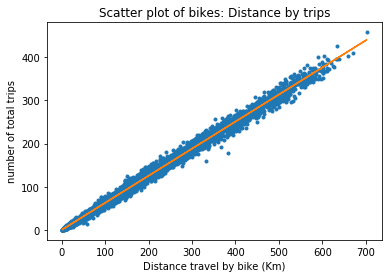

In [35]:
#regression line
m, b = np.polyfit(bike_id_distance['distance'], bike_id_count_sum['bike trips'], 1)
#pearsonr
print(pearsonr(bike_id_distance['distance'], bike_id_count_sum['bike trips']))

plt.plot(bike_id_distance['distance'], bike_id_count_sum['bike trips'], '.')
plt.plot(bike_id_distance['distance'], b + m * bike_id_distance['distance'], '-')
plt.title('Scatter plot of bikes: Distance by trips')
plt.xlabel('Distance travel by bike (Km)')
plt.ylabel('number of total trips')
print(m)

Text(0,0.5,'quantity of bikes')

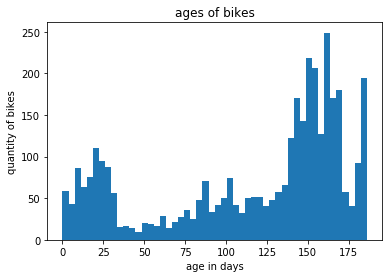

In [36]:
df_bike_age=df[['bike_id','start_time']].groupby('bike_id').agg([np.max,np.min,np.count_nonzero])
df_bike_age.columns=['last date','first date','trip count']
df_bike_age['age']= abs((df_bike_age['last date'] - df_bike_age['first date']))
df_bike_age['delta_2018']= abs(df_bike_age['last date'] - datetime(2018, 1, 1, 0, 0))
df_bike_age['age']=df_bike_age['age'].dt.days
df_bike_age['delta_2018']=df_bike_age['delta_2018'].dt.days
df_bike_age=df_bike_age.reset_index()
plt.hist(df_bike_age['age'],bins=50)
plt.title('ages of bikes')
plt.xlabel('age in days')
plt.ylabel('quantity of bikes')

In [38]:
min_date=df_bike_age['first date'].min()
max_date=df_bike_age['last date'].max()
print(max_date)

2017-12-31 23:59:01.261000


Text(0,0.5,'quantity of bikes')

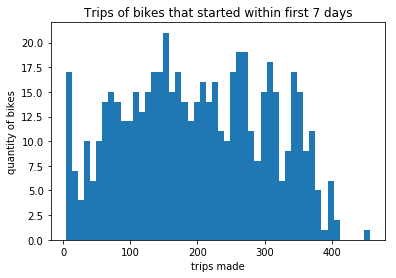

In [40]:
from datetime import timedelta
#df_bike_age[(df_bike_age['first date']>min_date+timedelta(days=25))&(df_bike_age['out of commision']==True)].hist(column='trip count',bins=20)
plt.hist(df_bike_age[(df_bike_age['first date']<min_date+timedelta(days=7))]['trip count'],bins=50)
plt.title('Trips of bikes that started within first 7 days')
plt.xlabel('trips made')
plt.ylabel('quantity of bikes')

Text(0,0.5,'quantity of bikes')

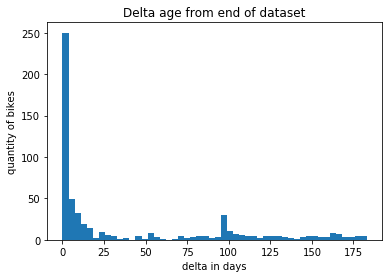

In [41]:
plt.hist(df_bike_age[df_bike_age['first date']<min_date+timedelta(days=7)]['delta_2018'],bins=50)
plt.title('Delta age from end of dataset')
plt.xlabel('delta in days')
plt.ylabel('quantity of bikes')

Text(0.5,0,'Rate of use(trips/age)')

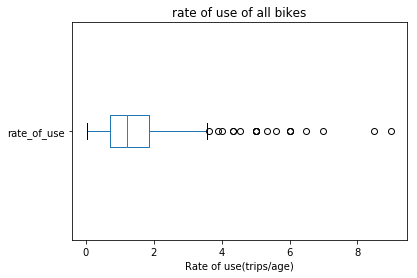

In [42]:
df_bike_age['rate_of_use']=df_bike_age['trip count']/df_bike_age['age']
ax=df_bike_age['rate_of_use'].plot.box(vert=False,title='rate of use of all bikes')
ax.set_xlabel('Rate of use(trips/age)')

In [43]:
df_bike_age['out of commision']=df_bike_age['delta_2018'].apply(lambda x:x>25)

Text(0,0.5,'quantity of bikes')

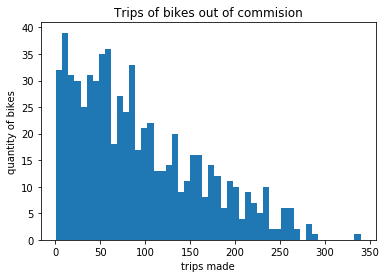

In [44]:
#df_bike_age[df_bike_age['out of commision']==True].hist(column='trip count')
plt.hist(df_bike_age[df_bike_age['out of commision']==True]['trip count'],bins=50)
plt.title('Trips of bikes out of commision')
plt.xlabel('trips made')
plt.ylabel('quantity of bikes')

Text(0.5,0,'Rate of use(trips/age)')

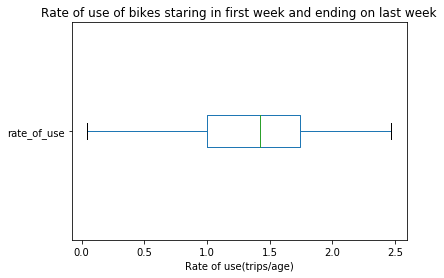

In [45]:
ax=df_bike_age[(df_bike_age['first date']<min_date+timedelta(days=7))&(df_bike_age['last date']>max_date-timedelta(days=7))]['rate_of_use'].plot.box(vert=False,title='Rate of use of bikes staring in first week and ending on last week')
ax.set_xlabel('Rate of use(trips/age)')
#determine that a high rate of use would be 75 percentile or 1.8

In [46]:
#percentage of bikes that started within the first 7 days and ended after the last 30 days that had a rate of use of 1.8
len(df_bike_age[(df_bike_age['first date']<min_date+timedelta(days=7))&(df_bike_age['last date']>max_date-timedelta(days=30))&(df_bike_age['rate_of_use']>=1.8)])/len(df_bike_age)

0.021780560849441872

Text(0,0.5,'quantity of bikes')

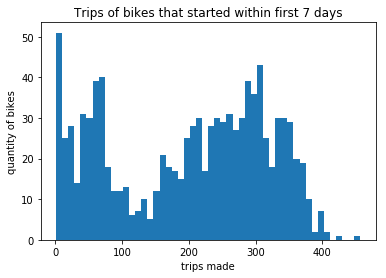

In [47]:
len(df_bike_age[(df_bike_age['rate_of_use']>=1.8)&(df_bike_age['out of commision']==True)])/len(df_bike_age[df_bike_age['out of commision']==True])*100

plt.hist(df_bike_age[(df_bike_age['rate_of_use']>=1.8)]['trip count'],bins=50)
plt.title('Trips of bikes that started within first 7 days')
plt.xlabel('trips made')
plt.ylabel('quantity of bikes')

Text(0,0.5,'quantity of bikes')

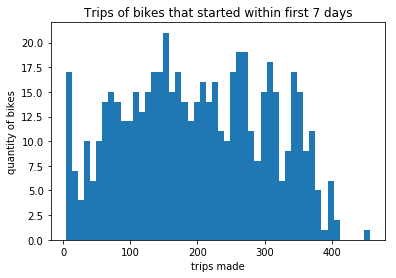

In [48]:
plt.hist(df_bike_age[(df_bike_age['first date']<min_date+timedelta(days=7))]['trip count'],bins=50)
plt.title('Trips of bikes that started within first 7 days')
plt.xlabel('trips made')
plt.ylabel('quantity of bikes')

0.01769670569017152

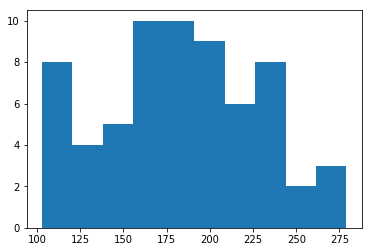

In [49]:
#trips of bike that started with the first 25 day and ended after the last 25 days
plt.hist(df_bike_age[(df_bike_age['rate_of_use']>=1.8)&(df_bike_age['first date']>min_date+timedelta(days=25))&(df_bike_age['last date']<max_date-timedelta(days=25))&(df_bike_age['age']>50)]['trip count'])
#percentage compared to total bikes
len(df_bike_age[(df_bike_age['rate_of_use']>=1.8)&(df_bike_age['first date']>min_date+timedelta(days=25))&(df_bike_age['last date']<max_date-timedelta(days=25))&(df_bike_age['age']>50)])/len(df_bike_age)

In [50]:
df_early_high_rate=df_bike_age[(df_bike_age['rate_of_use']>=1.8)&(df_bike_age['first date']<min_date+timedelta(days=7))]

In [51]:
(df_early_high_rate['delta_2018']<25).mean()

0.47023809523809523

In [53]:
df_bike_age[df_bike_age['first date']<min_date+timedelta(days=7)]

,bike_id,last date,first date,trip count,age,delta_2018,rate_of_use,out of commision
3,13,2017-07-03 08:32:29.946,2017-06-28 11:31:13.362,4,4,181,1.000000,True
5,15,2017-12-04 18:14:33.749,2017-06-29 11:44:43.344,137,158,27,0.867089,True
7,17,2017-12-26 18:18:59.916,2017-06-28 20:18:07.989,220,180,5,1.222222,False
8,18,2017-11-07 22:33:43.119,2017-06-28 13:56:22.259,151,132,54,1.143939,True
9,19,2017-08-02 16:47:47.954,2017-06-28 11:35:16.753,60,35,151,1.714286,True
10,20,2017-12-31 15:10:36.695,2017-06-28 10:16:16.575,311,186,0,1.672043,False
11,21,2017-12-27 11:49:32.691,2017-06-28 10:16:30.606,199,182,4,1.093407,False
12,22,2017-12-30 14:08:54.332,2017-06-29 10:10:51.894,267,184,1,1.451087,False
13,23,2017-10-21 10:58:38.640,2017-06-28 15:05:04.177,201,114,71,1.763158,True
15,25,2017-12-02 18:03:25.377,2017-06-28 10:52:55.763,262,157,29,1.668790,True


Text(0.5,0,'Number of rides')

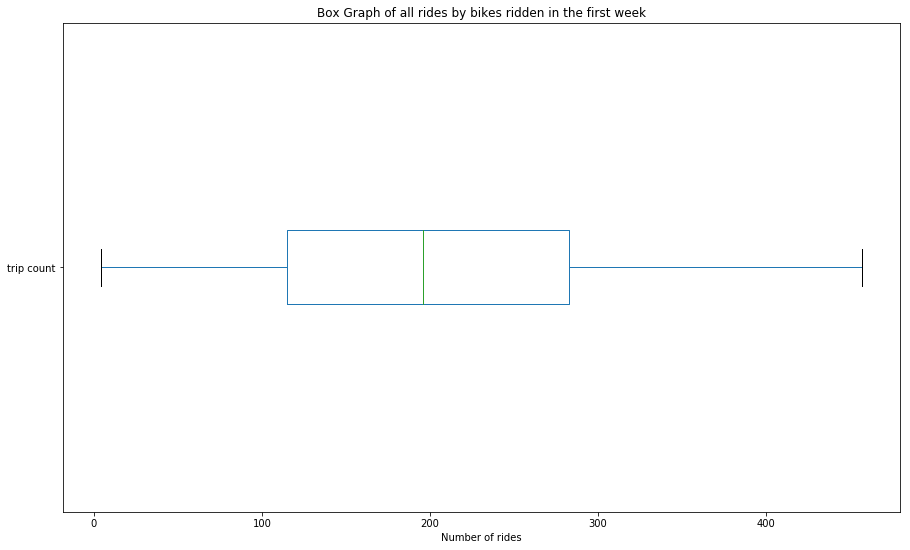

In [54]:
ax=df_bike_age[(df_bike_age['first date']<min_date+timedelta(days=7))]['trip count'].plot.box(figsize=(15,9),vert=False,title='Box Graph of all rides by bikes ridden in the first week')
ax.set_xlabel('Number of rides')

In [55]:
from scipy.stats import poisson
df_bike_age['poisson_trip']=poisson.cdf(df_bike_age['trip count'],df_bike_age['trip count'].mean())

In [57]:
bike_id_count['poisson_trips']=poisson.cdf(bike_id_count['bike trips'],bike_id_count['bike trips'].mean())
#print(poisson.cdf(50,bike_id_count['bike trips'].mean()))
#bike_id_count.hist(column='poisson_trips',bins=20)

Text(0,0.5,'quantity of bikes')

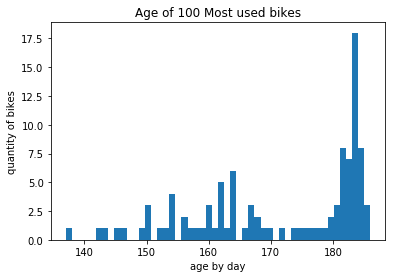

In [59]:
df_bike_top=df_bike_age.sort_values('trip count', ascending=False).head(100)
plt.hist(df_bike_top['age'],bins=50)
plt.title('Age of 100 Most used bikes')
plt.xlabel('age by day')
plt.ylabel('quantity of bikes')

Text(0,0.5,'quantity of bikes')

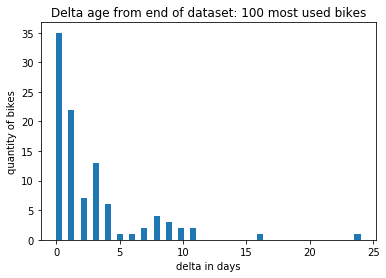

In [60]:
plt.hist(df_bike_top['delta_2018'],bins=50)
plt.title('Delta age from end of dataset: 100 most used bikes')
plt.xlabel('delta in days')
plt.ylabel('quantity of bikes')